In [ ]:
import pyshark
import matplotlib.pyplot as plt
import nest_asyncio
nest_asyncio.apply()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [15]:
def analyze_pcap(file_path):
    cap = pyshark.FileCapture(file_path, display_filter="tcp.port==8080")
    
    total_bytes = 0
    data_bytes = 0
    packets = 0
    retransmissions = 0
    max_packet_size = 0
    timestamps = []
    packet_sizes = []
    payload = []
    first_timestamp = None
    last_timestamp = None
    
    for pkt in cap:
        if not first_timestamp:
            first_timestamp = float(pkt.sniff_timestamp)
        last_timestamp = float(pkt.sniff_timestamp)
        
        packet_size = int(pkt.length)
        total_bytes += packet_size
        packets += 1
        
        if hasattr(pkt.tcp, 'payload'):
            data_size = len(pkt.tcp.payload.replace(':', '')) // 2  # Hex string to bytes
            data_bytes += data_size
            payload.append(data_size)
        
        max_packet_size = max(max_packet_size, packet_size)
        
        if 'tcp.analysis.retransmission' in str(pkt):
            retransmissions += 1
        
        timestamps.append(float(pkt.sniff_timestamp) - first_timestamp)
        packet_sizes.append(packet_size)
    
    cap.close()

    duration = last_timestamp - first_timestamp
    throughput = total_bytes * 8 / duration if duration > 0 else 0  # bits/sec
    goodput = data_bytes * 8 / duration if duration > 0 else 0    # bits/sec
    packet_loss_rate = retransmissions / packets if packets > 0 else 0
    
    return {
        'throughput': throughput,
        'goodput': goodput,
        'packet_loss_rate': packet_loss_rate,
        'max_packet_size': max_packet_size,
        'timestamps': timestamps,
        'packet_sizes': packet_sizes,
        'payload': payload
    }

def print_metrics(metrics, label):
    print(f"\nMetrics for {label}:")
    print(f"Throughput: {metrics['throughput']:.2f} bps")
    print(f"Goodput: {metrics['goodput']:.2f} bps")
    print(f"Packet Loss Rate: {metrics['packet_loss_rate']:.2f}")
    print(f"Maximum Packet Size: {metrics['max_packet_size']} bytes")

def plot_packet_sizes(timestamps_list, packet_sizes_list, labels):
    plt.figure(figsize=(12, 6))
    for timestamps, packet_sizes, label in zip(timestamps_list, packet_sizes_list, labels):
        plt.plot(timestamps, packet_sizes, label=label, alpha=0.7)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Packet Size (bytes)")
    plt.title("Packet Size Over Time for Different Configurations")
    plt.legend()
    plt.grid(True)
    plt.savefig("packet_sizes_comparison.png")
    plt.show()

In [ ]:

    
metrics_list = []
timestamps_list = []
packet_sizes_list = []

# for pcap_file, label in configs:
    
# # 

In [17]:
pcap_file = "../PCAPs/ND11.pcap"
label = "Nagle On, Delayed-ACK On"
print(f"\nAnalyzing {pcap_file}...")
metrics = analyze_pcap(pcap_file)
print_metrics(metrics, label)
metrics_list.append(metrics)
timestamps_list.append(metrics['timestamps'])
packet_sizes_list.append(metrics['packet_sizes'])


Analyzing ../PCAPs/ND11.pcap...

Metrics for Nagle On, Delayed-ACK On:
Throughput: 551486.72 bps
Goodput: 442745.90 bps
Packet Loss Rate: 0.00
Maximum Packet Size: 1514 bytes


In [18]:
print("Packet Sizes:")
print(metrics['packet_sizes'])

print("\nPayload Sizes:")
print(metrics['payload'])

total_payload_size = sum(metrics['payload'])
print("\nTotal Payload Size:")
print(total_payload_size)

Packet Sizes:
[74, 74, 106, 66, 106, 1514, 66, 138, 1514, 66, 98, 1082, 66, 66, 66]

Payload Sizes:
[40, 40, 1448, 72, 1448, 32, 1016]

Total Payload Size:
4096


In [19]:
pcap_file = "../PCAPs/ND10.pcap"
label = "Nagle On, Delayed-ACK Off"
print(f"\nAnalyzing {pcap_file}...")
metrics = analyze_pcap(pcap_file)
print_metrics(metrics, label)
metrics_list.append(metrics)
timestamps_list.append(metrics['timestamps'])
packet_sizes_list.append(metrics['packet_sizes'])


Analyzing ../PCAPs/ND10.pcap...

Metrics for Nagle On, Delayed-ACK Off:
Throughput: 1610723.23 bps
Goodput: 415985.02 bps
Packet Loss Rate: 0.00
Maximum Packet Size: 186 bytes


In [20]:
print("Packet Sizes:")
print(metrics['packet_sizes'])

print("\nPayload Sizes:")
print(metrics['payload'])

total_payload_size = sum(metrics['payload'])
print("\nTotal Payload Size:")
print(total_payload_size)

Packet Sizes:
[74, 74, 66, 106, 66, 106, 66, 146, 66, 146, 66, 106, 66, 146, 66, 106, 66, 146, 66, 146, 66, 146, 66, 146, 66, 146, 66, 106, 66, 106, 66, 186, 66, 106, 66, 106, 66, 146, 66, 146, 66, 106, 66, 146, 66, 106, 66, 146, 66, 106, 66, 106, 66, 146, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 146, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 146, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 82, 66, 66, 66, 66]

Payload Sizes:
[40, 40, 80, 80, 40, 80, 40, 80, 80, 80, 80, 80, 40, 40, 120, 40, 40, 80, 80, 40, 80, 40, 80, 40, 40, 80, 40, 40, 40, 40, 40, 40, 80, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40

In [21]:
pcap_file = "../PCAPs/ND01.pcap"
label = "Nagle Off, Delayed-ACK On"
print(f"\nAnalyzing {pcap_file}...")
metrics = analyze_pcap(pcap_file)
print_metrics(metrics, label)
metrics_list.append(metrics)
timestamps_list.append(metrics['timestamps'])
packet_sizes_list.append(metrics['packet_sizes'])


Analyzing ../PCAPs/ND01.pcap...

Metrics for Nagle Off, Delayed-ACK On:
Throughput: 1434038.96 bps
Goodput: 409554.01 bps
Packet Loss Rate: 0.00
Maximum Packet Size: 106 bytes


In [22]:
print("Packet Sizes:")
print(metrics['packet_sizes'])

print("\nPayload Sizes:")
print(metrics['payload'])

total_payload_size = sum(metrics['payload'])
print("\nTotal Payload Size:")
print(total_payload_size)

Packet Sizes:
[74, 74, 106, 66, 106, 106, 106, 106, 106, 106, 106, 66, 106, 106, 106, 106, 66, 106, 106, 66, 106, 66, 106, 106, 106, 106, 66, 106, 66, 106, 106, 106, 66, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 106, 106, 106, 66, 66, 106, 106, 66, 106, 106, 106, 66, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 82, 66, 66, 66]

Payload Sizes:
[40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40

In [23]:
pcap_file = "../PCAPs/ND00.pcap"
label = "Nagle Off, Delayed-ACK Off"
print(f"\nAnalyzing {pcap_file}...")
metrics = analyze_pcap(pcap_file)
print_metrics(metrics, label)
metrics_list.append(metrics)
timestamps_list.append(metrics['timestamps'])
packet_sizes_list.append(metrics['packet_sizes'])


Analyzing ../PCAPs/ND00.pcap...

Metrics for Nagle Off, Delayed-ACK Off:
Throughput: 1827746.04 bps
Goodput: 427552.70 bps
Packet Loss Rate: 0.00
Maximum Packet Size: 106 bytes


In [24]:
print("Packet Sizes:")
print(metrics['packet_sizes'])

print("\nPayload Sizes:")
print(metrics['payload'])

total_payload_size = sum(metrics['payload'])
print("\nTotal Payload Size:")
print(total_payload_size)

Packet Sizes:
[74, 74, 66, 106, 106, 66, 66, 106, 66, 106, 106, 66, 66, 106, 106, 66, 106, 66, 106, 106, 66, 106, 106, 66, 66, 66, 66, 106, 66, 106, 106, 106, 66, 106, 106, 66, 66, 106, 66, 66, 106, 66, 106, 106, 66, 106, 66, 106, 106, 66, 106, 66, 106, 66, 106, 106, 66, 106, 66, 106, 106, 106, 66, 106, 106, 66, 66, 106, 106, 66, 106, 106, 66, 106, 106, 66, 106, 66, 66, 106, 66, 106, 106, 66, 66, 106, 66, 106, 106, 66, 106, 66, 106, 106, 66, 66, 106, 106, 66, 106, 66, 66, 106, 66, 106, 66, 106, 66, 106, 106, 66, 106, 66, 66, 106, 106, 66, 66, 106, 106, 66, 106, 66, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 106, 66, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 106, 66, 82, 66, 66, 66, 66]

Payload Sizes:
[40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40


Plotting comparison...


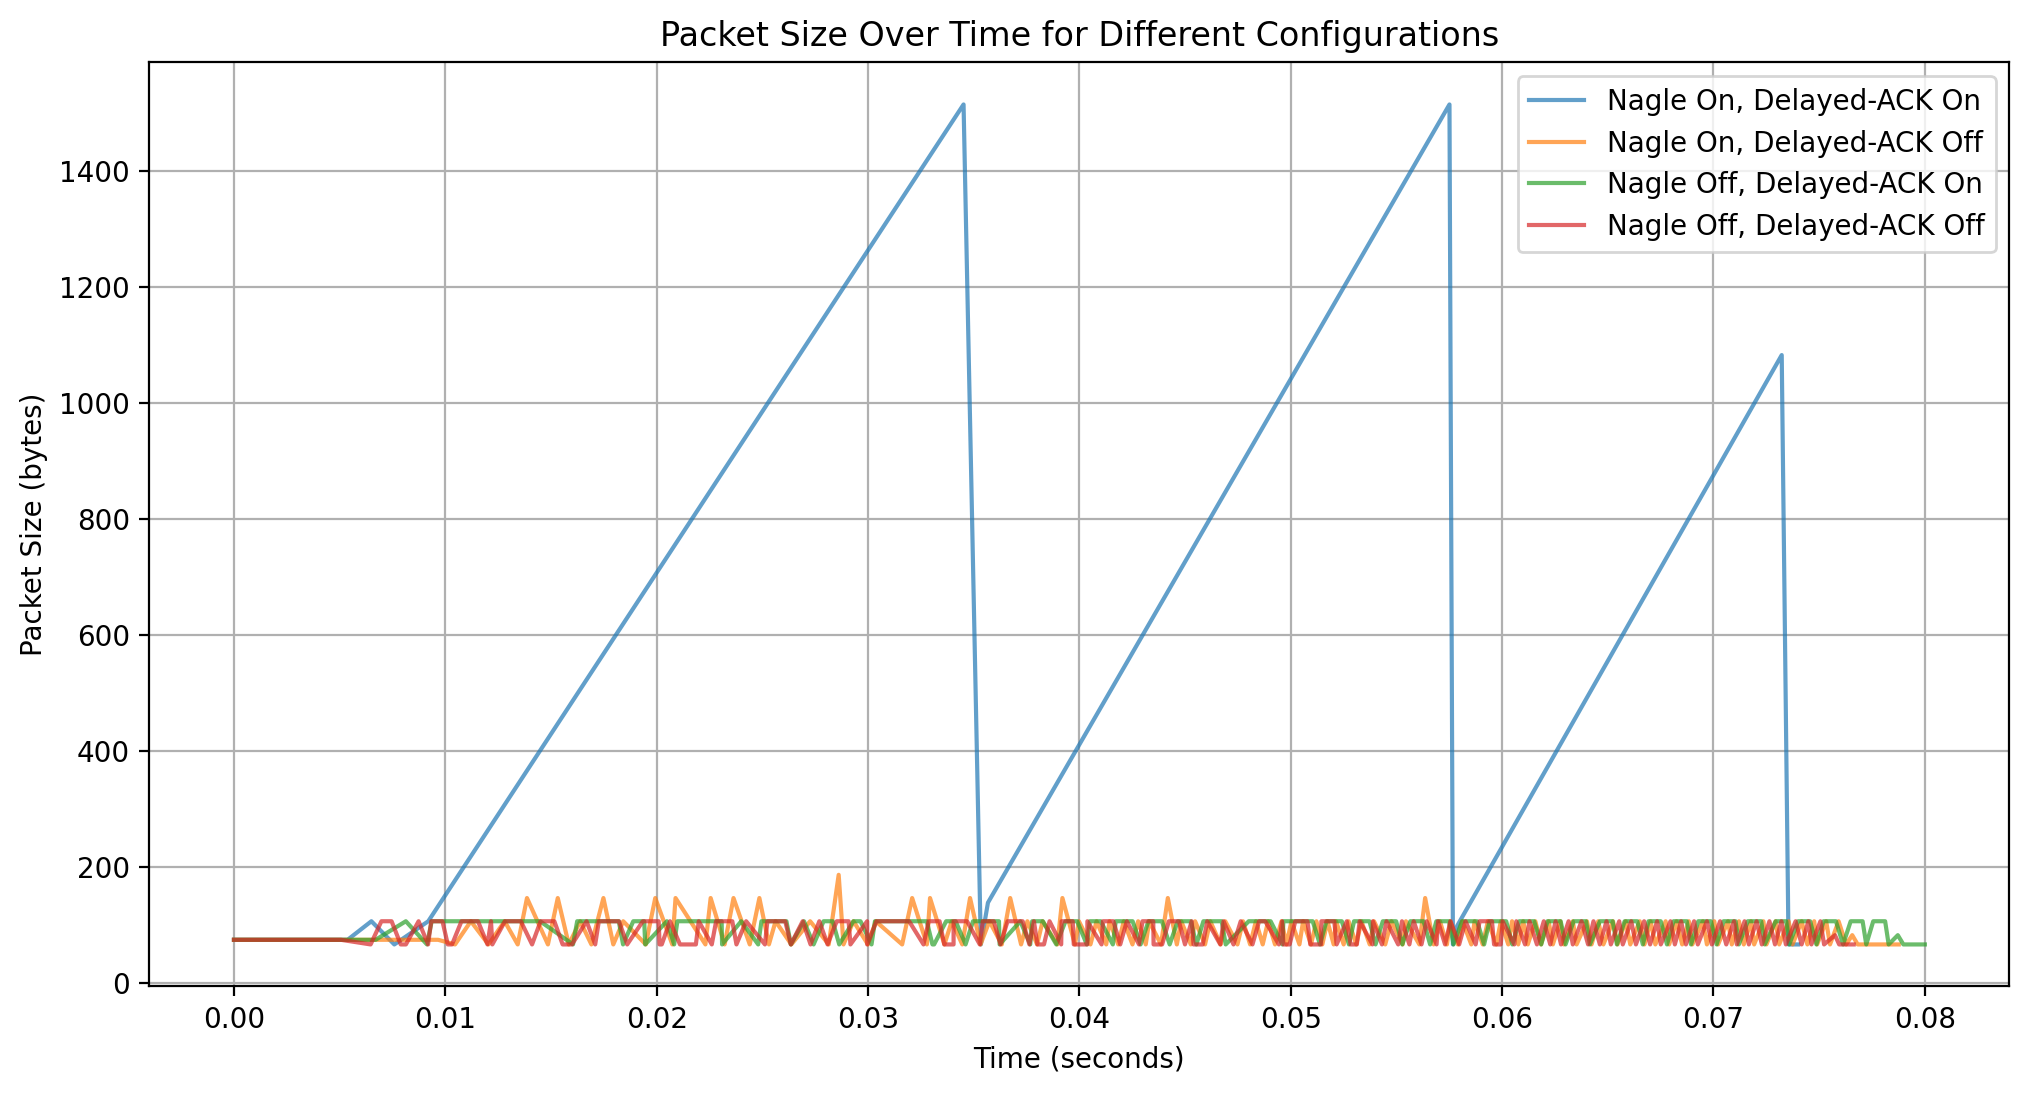

In [25]:
configs = [
        ("nagle_on_delayed_ack_on.pcap", "Nagle On, Delayed-ACK On"),
        ("nagle_on_delayed_ack_off.pcap", "Nagle On, Delayed-ACK Off"),
        ("nagle_off_delayed_ack_on.pcap", "Nagle Off, Delayed-ACK On"),
        ("nagle_off_delayed_ack_off.pcap", "Nagle Off, Delayed-ACK Off")
    ]

print("\nPlotting comparison...")
plot_packet_sizes(timestamps_list, packet_sizes_list, [label for _, label in configs])